In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
df_expo = pd.read_excel(r'/content/drive/MyDrive/Data/Raw/soya_regresor.xlsx')

In [3]:
df_expo.head()

,YEAR,MONTH,PIB_MES_1,COMM_ACEITE_MES_1,KILBRU_ACEITE_MES_1,VALOR_FOB_ACEITE_MES_1,PIB_MES_12,COMM_ACEITE_MES_12,KILBRU_ACEITE_MES_12,VALOR_FOB_ACEITE_MES_12,VALOR_FOB_ACEITE,KILBRU_TORTA_MES_1,COMM_HARINA_MES_1,VALOR_FOB_TORTA_MES_1,KILBRU_TORTA_MES_12,COMM_HARINA_MES_12,VALOR_FOB_TORTA_MES_12,VALOR_FOB_TORTA
0,1992,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304451.0,NaN,NaN,NaN,NaN,NaN,NaN,1089250.0
1,1992,2,307.670824,420.421,365720.0,304451.0,NaN,NaN,NaN,NaN,430771.0,4657464.0,175.8,1089250.0,NaN,NaN,NaN,3240782.0
2,1992,3,306.133843,424.389,509268.0,430771.0,NaN,NaN,NaN,NaN,646738.0,14997048.0,174.1,3240782.0,NaN,NaN,NaN,1795147.0
3,1992,4,304.517081,446.436,771850.0,646738.0,NaN,NaN,NaN,NaN,595243.0,6022430.0,178.7,1795147.0,NaN,NaN,NaN,2976684.0
4,1992,5,347.020861,430.121,690990.0,595243.0,NaN,NaN,NaN,NaN,169422.0,11647644.0,172.9,2976684.0,NaN,NaN,NaN,940598.0


In [4]:
df_expo = df_expo.dropna()
df_expo.shape

(351, 18)

In [5]:
df_expo = df_expo.rename(columns={"GESTION": "YEAR", "MES": "MONTH"})
df_expo['DATE'] = pd.to_datetime(df_expo[['YEAR', 'MONTH']].assign(DAY=1))
df_expo = df_expo.set_index('DATE')

In [6]:
df_expo[280:]

,YEAR,MONTH,PIB_MES_1,COMM_ACEITE_MES_1,KILBRU_ACEITE_MES_1,VALOR_FOB_ACEITE_MES_1,PIB_MES_12,COMM_ACEITE_MES_12,KILBRU_ACEITE_MES_12,VALOR_FOB_ACEITE_MES_12,VALOR_FOB_ACEITE,KILBRU_TORTA_MES_1,COMM_HARINA_MES_1,VALOR_FOB_TORTA_MES_1,KILBRU_TORTA_MES_12,COMM_HARINA_MES_12,VALOR_FOB_TORTA_MES_12,VALOR_FOB_TORTA
DATE,,,,,,,,,,,,,,,,,,
2016-05-01,2016,5,487.014026,748.531,27539712.00,18435928.01,475.666499,716.490,46562419.00,30708404.58,24453276.36,94812492.0,332.1,27016165.76,168688142.1,305.7,55322429.42,59290718.08
2016-06-01,2016,6,488.073519,707.032,36578211.00,24453276.36,477.057337,738.037,39257611.00,26230718.60,23198508.32,204303313.0,396.6,59290718.08,149899892.0,359.5,47921947.13,72189827.90
2016-07-01,2016,7,488.782413,703.604,35404370.00,23198508.32,458.877234,695.788,48018693.00,32374528.88,42244118.06,214772024.0,405.3,72189827.90,200395215.6,354.6,64348996.62,72746415.10
2016-08-01,2016,8,476.626588,669.863,64195132.00,42244118.06,458.208317,628.747,33790454.00,21832183.43,38474056.83,198620492.0,350.0,72746415.10,157583735.0,320.9,49976772.02,74631803.30
2016-09-01,2016,9,476.626588,711.738,57143610.00,38474056.83,458.208317,590.250,41576330.00,26502469.68,29208538.92,212354878.4,312.2,74631803.30,142389732.0,308.3,44343811.32,65759895.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,2021,11,547.891754,1347.611,40037507.72,48593988.48,547.306496,812.678,20536880.98,15984574.74,40984407.67,172498010.4,332.6,60246923.95,140624098.8,393.1,48353541.40,54870921.57
2021-12-01,2021,12,548.686376,1305.901,31678494.97,40984407.67,548.100269,881.287,31640152.80,24863467.72,48378799.14,157040560.2,348.8,54870921.57,146697665.8,434.4,54058393.17,52564625.61
2022-01-01,2022,1,547.891754,1216.078,37251650.72,48378799.14,477.023644,956.608,32637873.92,29177493.18,46848965.67,151537592.8,411.7,52564625.61,133954137.0,431.0,56175433.23,67724077.75


In [7]:
df_expo.columns

Index(['YEAR', 'MONTH', 'PIB_MES_1', 'COMM_ACEITE_MES_1',
       'KILBRU_ACEITE_MES_1', 'VALOR_FOB_ACEITE_MES_1', 'PIB_MES_12',
       'COMM_ACEITE_MES_12', 'KILBRU_ACEITE_MES_12', 'VALOR_FOB_ACEITE_MES_12',
       'VALOR_FOB_ACEITE', 'KILBRU_TORTA_MES_1', 'COMM_HARINA_MES_1',
       'VALOR_FOB_TORTA_MES_1', 'KILBRU_TORTA_MES_12', 'COMM_HARINA_MES_12',
       'VALOR_FOB_TORTA_MES_12', 'VALOR_FOB_TORTA'],
      dtype='object')

In [8]:
features = ['MONTH', 'PIB_MES_1', 'COMM_ACEITE_MES_1',
       'KILBRU_ACEITE_MES_1', 'VALOR_FOB_ACEITE_MES_1', 'PIB_MES_12', 'COMM_ACEITE_MES_12',
       'KILBRU_ACEITE_MES_12', 'VALOR_FOB_ACEITE_MES_12']
label = 'VALOR_FOB_ACEITE'

In [9]:
df_aceite_test = df_expo['VALOR_FOB_ACEITE'].to_frame()[280:]

In [ ]:
#features = ['COMM_ACEITE_USD_TON', 'KILBRU_ACEITE', 'MES_ANTERIOR', 'GESTION_PASADA']
#label = 'VALOR_FOB_ACEITE'

In [10]:
train_df = df_expo[:280]
test_df = df_expo[280:]
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 9), (280,), (71, 9), (71,))

In [28]:
reg = XGBRegressor(n_estimators=700, learning_rate=0.05)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[07:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:1.06228e+07	validation_1-mae:2.64266e+07
[1]	validation_0-mae:1.01056e+07	validation_1-mae:2.53958e+07
[2]	validation_0-mae:9.61406e+06	validation_1-mae:2.44245e+07
[3]	validation_0-mae:9.15354e+06	validation_1-mae:2.34803e+07
[4]	validation_0-mae:8.71504e+06	validation_1-mae:2.26312e+07
[5]	validation_0-mae:8.30122e+06	validation_1-mae:2.17271e+07
[6]	validation_0-mae:7.90486e+06	validation_1-mae:2.09577e+07
[7]	validation_0-mae:7.52837e+06	validation_1-mae:2.02275e+07
[8]	validation_0-mae:7.17982e+06	validation_1-mae:1.95327e+07
[9]	validation_0-mae:6.85493e+06	validation_1-mae:1.88649e+07
[10]	validation_0-mae:6.5498e+06	validation_1-mae:1.83589e+07
[11]	validation_0-mae:6.2563e+06	validation_1-mae:1.77588e+07
[12]	validation_0-mae:5.98503e+06	validation_1-mae:1.73088e+07
[13]	validation_0-mae:5.73279e+06	validation_1-mae:1.66848e+07
[14

XGBRegressor(learning_rate=0.05, n_estimators=700)

In [29]:
predictions = reg.predict(X_test)
df_aceite_test['xgboost'] = reg.predict(X_test)

In [30]:
plt.style.use('fivethirtyeight')

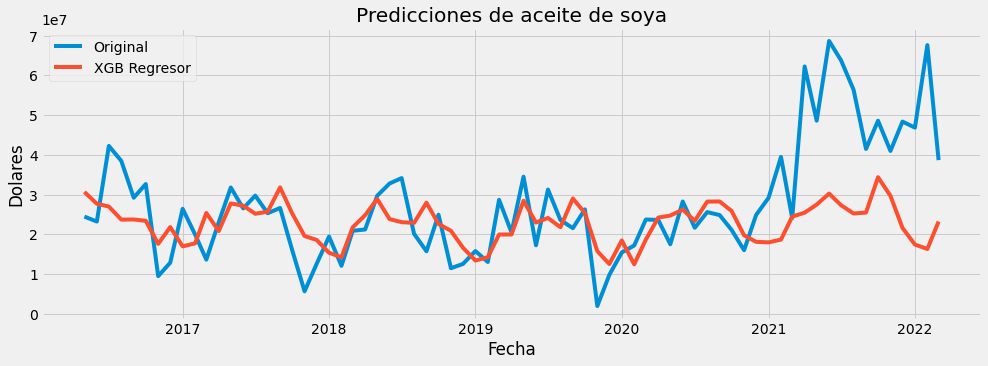

In [31]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.plot(df_aceite_test.index, df_aceite_test['VALOR_FOB_ACEITE'], label='Original')
axes.plot(df_aceite_test.index, df_aceite_test['xgboost'], label='XGB Regresor')
axes.legend()
axes.set_xlabel('Fecha')
axes.set_ylabel('Dolares')
plt.title('Predicciones de aceite de soya')
plt.show()

In [30]:
from sklearn.metrics import *

In [32]:
mean = np.mean(df_aceite_test['VALOR_FOB_ACEITE'])
print("The actual mean is {:.2f}.".format(mean))

The actual mean is 27509917.83.


In [33]:
rmse = np.sqrt(mean_squared_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['xgboost']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 13641747.95.


In [34]:
mape = mean_absolute_percentage_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['xgboost'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.41.


In [35]:
r2 = r2_score(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['xgboost'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.08.


In [36]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [37]:
smape = smape(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['xgboost'])

In [40]:
metrics = np.round([rmse, mape, r2, smape], 3)
errors = pd.DataFrame({'Metricas': ['RMSE', 'MAPE', 'R2', 'SMAPE'], 'Resultados': metrics})
errors

,Metricas,Resultados
0,RMSE,1.364175e+07
1,MAPE,4.050000e-01
2,R2,8.500000e-02
3,SMAPE,3.364400e+01


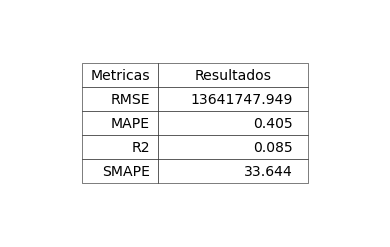

In [41]:
fig, ax = plt.subplots() 
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=errors.values, 
                      #rowLabels=rows, 
                      #rowColours=colors, 
                      colLabels=errors.columns, 
                      loc='center', 
                 colWidths=[0.2, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)
plt.show() 